In [1]:
import sys
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt



path='/home/jbohne/sbu/'
sys.path.append(f'{path}taq_db/TAQ-Query-Scripts/data')
sys.path.append(f'{path}research/Adaptive_Signal_Estimation_Private')

from trend_filtering.adaptive_tf import adaptive_tf
from trend_filtering.test_adaptive_tf import test_adaptive_tf
from profiling.profiler import profile

In [2]:
trades=pd.read_csv(f'{path}taq_db/TAQ-Query-Scripts/data/AAPL_trades.csv',index_col=0).dropna()
trades

,Time,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,date
2020-01-02 09:30:00.624116,2020-01-02 09:30:00.624116,N,AAPL,50,296.23,@ I,N,2020-01-02
2020-01-02 09:30:00.836409,2020-01-02 09:30:00.836409,N,AAPL,22,296.25,@ I,N,2020-01-02
2020-01-02 09:30:01.073828,2020-01-02 09:30:01.073828,N,AAPL,31,296.26,@ I,N,2020-01-02
2020-01-02 09:30:01.261512,2020-01-02 09:30:01.261512,N,AAPL,3,296.27,@ I,N,2020-01-02
2020-01-02 09:30:01.294279,2020-01-02 09:30:01.294279,N,AAPL,31,296.25,@ I,N,2020-01-02
...,...,...,...,...,...,...,...,...
2020-01-29 15:59:53.741022,2020-01-29 15:59:53.741022,N,AAPL,200,324.19,@,N,2020-01-29
2020-01-29 15:59:54.202375,2020-01-29 15:59:54.202375,N,AAPL,7,324.20,@F I,N,2020-01-29
2020-01-29 15:59:54.211587,2020-01-29 15:59:54.211587,N,AAPL,18,324.15,@F I,N,2020-01-29
2020-01-29 15:59:55.697308,2020-01-29 15:59:55.697308,N,AAPL,3,324.26,@ I,N,2020-01-29


In [6]:
trades=pd.read_csv(f'{path}taq_db/TAQ-Query-Scripts/data/AAPL_trades.csv',index_col=0).dropna()
trades.index=pd.to_datetime(trades.index)
trades=trades.sort_index()

time=[(i-trades.index[0]).total_seconds() for i in trades.index]
price=trades['Trade_Price'].values


### Overview of Estimation

No solution found for lambda = 179.38220391348023
Status: maxiter exceeded


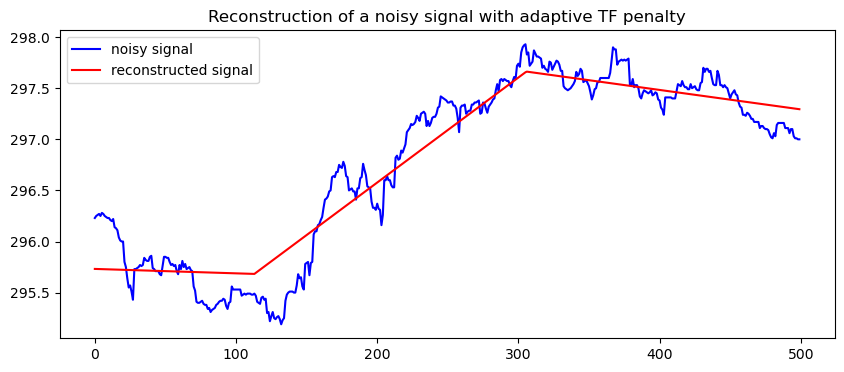

In [13]:
test_adaptive_tf(price,t=time,n=500,include_cv=True,lambda_p=1.0,plot=True,verbose=True)

### Performance of Sherman-Morrison -Woodbury Formula vs Naive Matrix Inversion (With Numba)


Naive Matrix Inversion

Profiling: test_adaptive_tf


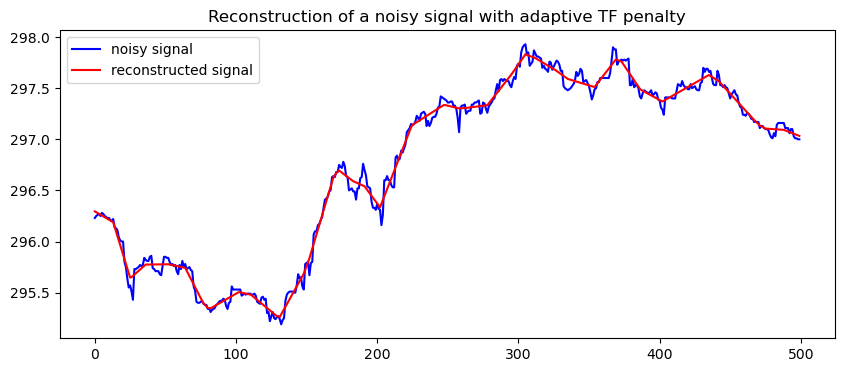


*** PROFILER RESULTS ***
inner (/home/jbohne/sbu/research/Adaptive_Signal_Estimation_Private/profiling/profiler.py:10)
function called 1 times

         221955 function calls (214983 primitive calls) in 1.306 seconds

   Ordered by: cumulative time, internal time, call count
   List reduced from 1871 to 1000 due to restriction <1000>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.306    1.306 profiler.py:10(inner)
        1    0.000    0.000    1.306    1.306 test_adaptive_tf.py:10(test_adaptive_tf)
        1    0.005    0.005    0.690    0.690 adaptive_tf.py:15(adaptive_tf)
       45    0.615    0.014    0.617    0.014 adaptive_tf.py:134(update_step)
        1    0.000    0.000    0.451    0.451 pyplot.py:376(show)
        1    0.000    0.000    0.451    0.451 backend_inline.py:72(show)
        1    0.000    0.000    0.450    0.450 display_functions.py:105(display)
        1    0.000    0.000    0.448    0.448 formatters.py:8

In [11]:
profile(test_adaptive_tf)(price,t=None,n=500,include_cv=False,lambda_p=1.0,plot=True,verbose=False)

Profiling: test_adaptive_tf


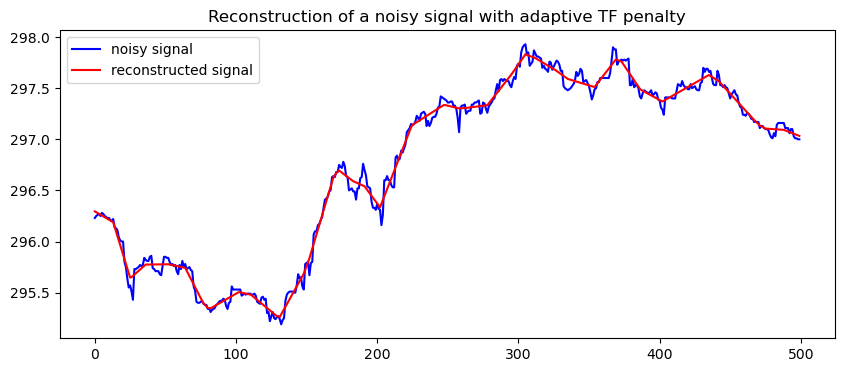


*** PROFILER RESULTS ***
inner (/home/jbohne/sbu/research/Adaptive_Signal_Estimation_Private/profiling/profiler.py:10)
function called 1 times

         210211 function calls (203636 primitive calls) in 1.394 seconds

   Ordered by: cumulative time, internal time, call count
   List reduced from 1544 to 1000 due to restriction <1000>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.394    1.394 profiler.py:10(inner)
        1    0.001    0.001    1.394    1.394 test_adaptive_tf.py:10(test_adaptive_tf)
        1    0.006    0.006    0.783    0.783 adaptive_tf.py:15(adaptive_tf)
        1    0.000    0.000    0.524    0.524 pyplot.py:376(show)
        1    0.000    0.000    0.524    0.524 backend_inline.py:72(show)
        1    0.000    0.000    0.524    0.524 display_functions.py:105(display)
        1    0.000    0.000    0.520    0.520 formatters.py:88(format)
       12    0.000    0.000    0.520    0.043 decorator.py:229(fun)


In [12]:
profile(test_adaptive_tf)(price,t=time,n=500,include_cv=False,lambda_p=1.0,plot=True,verbose=False)

### Sherman-Morrison -Woodbury Formula

(Not Proven to be an Increase in performance atm)

### Effect of Numba Compilation

-Has proven to increase performance